In [185]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps

filename = 'agent_log_20'
vid = False

x_max = 200
y_max = 200
z_max = 25

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use("seaborn-v0_8-whitegrid")

In [186]:
#df = pd.read_csv("../sosi/hpc_out/" + filename + ".csv")
df = pd.read_csv("../sosi/outputs/" + filename + ".csv")
#df = pd.read_csv("./old_output/" + filename + ".csv")
n = len(df["type"].unique())
colors = colormaps['tab10'].colors

In [187]:
counts_per_type = df.value_counts(['type', 'tick'])

In [188]:
df_first = df[df["tick"] == 0]
df_last = df[df["tick"] == df["tick"].max()]
print('\t\t tick = 0', '\t tick =', df["tick"].max())
print(
    "Total:\t\t",
    len(df_first),
    '\t\t',
    len(df_last),
    '\n'
)
print('Bacteria:\t', len(df_first[df_first["type"] == 0]), '\t\t', len(df_last[df_last["type"] == 0]))
print('Fungi:\t\t', len(df_first[df_first["type"] == 1]), '\t\t', len(df_last[df_last["type"] == 1]))
#print('Mycorrhizae:\t', len(df_first[df_first["type"] == 2]), '\t\t', len(df_last[df_last["type"] == 2]))
#print('Amoebae:\t', len(df_first[df_first["type"] == 2]), '\t\t', len(df_last[df_last["type"] == 2]))
#print('Flagellates:\t', len(df_first[df_first["type"] == 3]), '\t\t', len(df_last[df_last["type"] == 3]))
print('R.F. Nems:\t', len(df_first[df_first["type"] == 2]), '\t\t', len(df_last[df_last["type"] == 2]))
print('B. Nems:\t', len(df_first[df_first["type"] == 3]), '\t\t', len(df_last[df_last["type"] == 3]))
print('F. Nems:\t', len(df_first[df_first["type"] == 4]), '\t\t', len(df_last[df_last["type"] == 4]))
print('O. Nems:\t', len(df_first[df_first["type"] == 5]), '\t\t', len(df_last[df_last["type"] == 5]))
print('F. Mites:\t', len(df_first[df_first["type"] == 6]), '\t\t', len(df_last[df_last["type"] == 6]))
print('O. Mites:\t', len(df_first[df_first["type"] == 7]), '\t\t', len(df_last[df_last["type"] == 7]))
print('Collembolans:\t', len(df_first[df_first["type"] == 8]), '\t\t', len(df_last[df_last["type"] == 8]))

		 tick = 0 	 tick = 100
Total:		 97600 		 1645578 

Bacteria:	 36000 		 1523578
Fungi:		 24000 		 23215
R.F. Nems:	 8000 		 78593
B. Nems:	 12000 		 16388
F. Nems:	 10000 		 1792
O. Nems:	 1600 		 1178
F. Mites:	 3600 		 26
O. Mites:	 800 		 800
Collembolans:	 1600 		 8


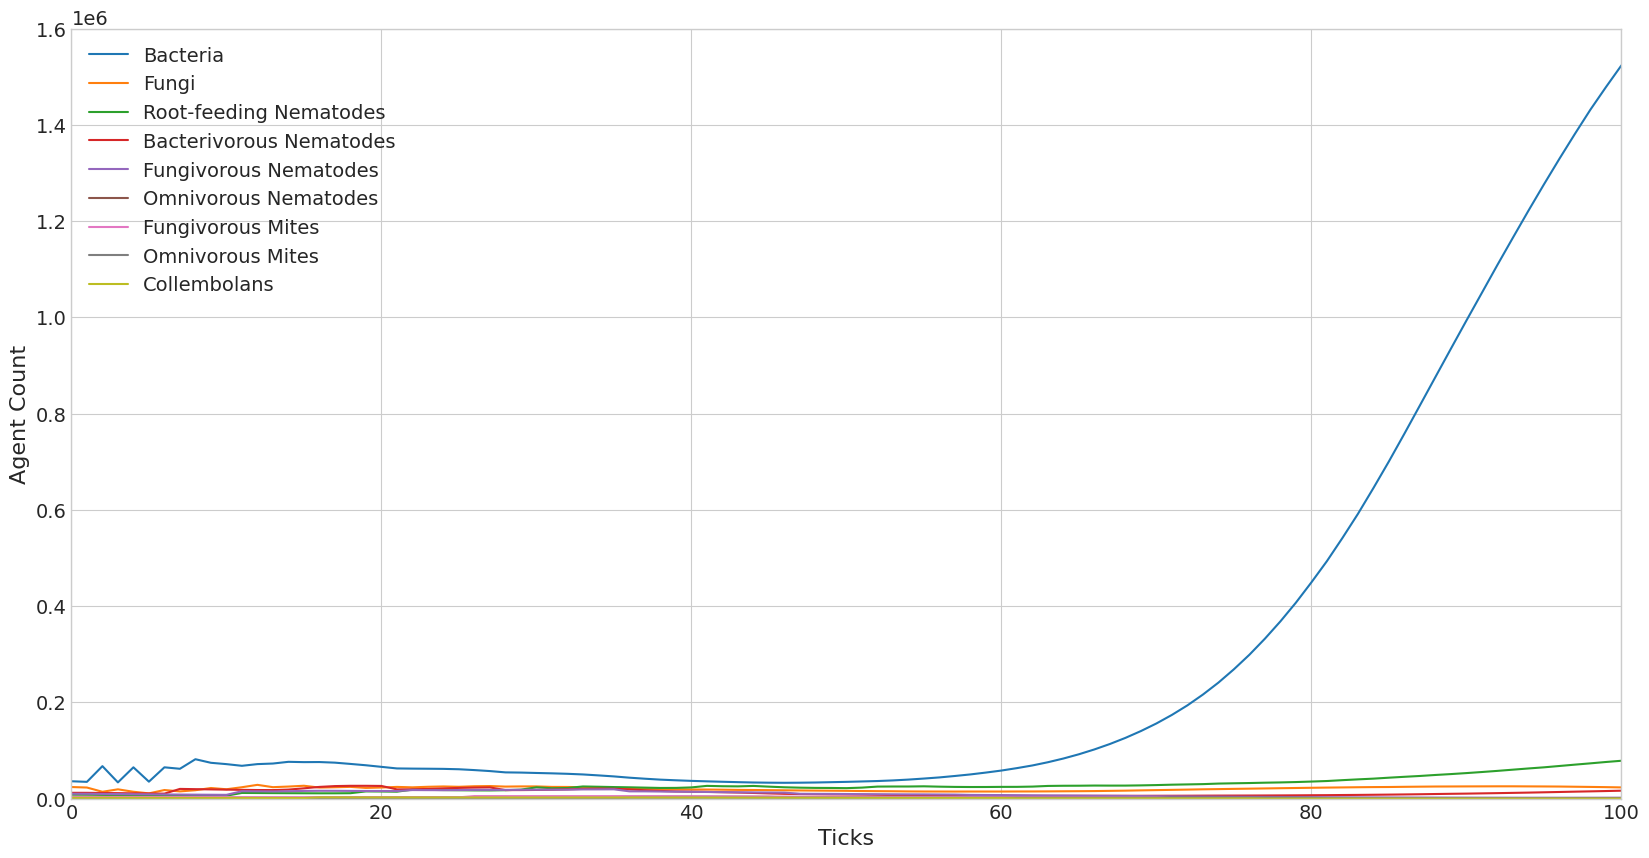

In [189]:
organism_group_labels = ["Bacteria", "Fungi", "Root-feeding Nematodes", "Bacterivorous Nematodes", "Fungivorous Nematodes", "Omnivorous Nematodes", "Fungivorous Mites", "Omnivorous Mites", "Collembolans"]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

for i in range(len(df['type'].unique())):
    plt.plot(
        range(len(df["tick"].unique())),
        counts_per_type[i].reindex(range(len(df['tick'].unique())), fill_value=0).sort_index().to_list(),
        label=organism_group_labels[i],
        color=colors[i]
    )
ax.set_xlim(0, 100)
ax.set_ylim(0, 1600000)
ax.set_xlabel("Ticks")
ax.set_ylabel("Agent Count")

plt.legend()
plt.savefig(filename + ".pdf", format="pdf", bbox_inches="tight")
plt.show()

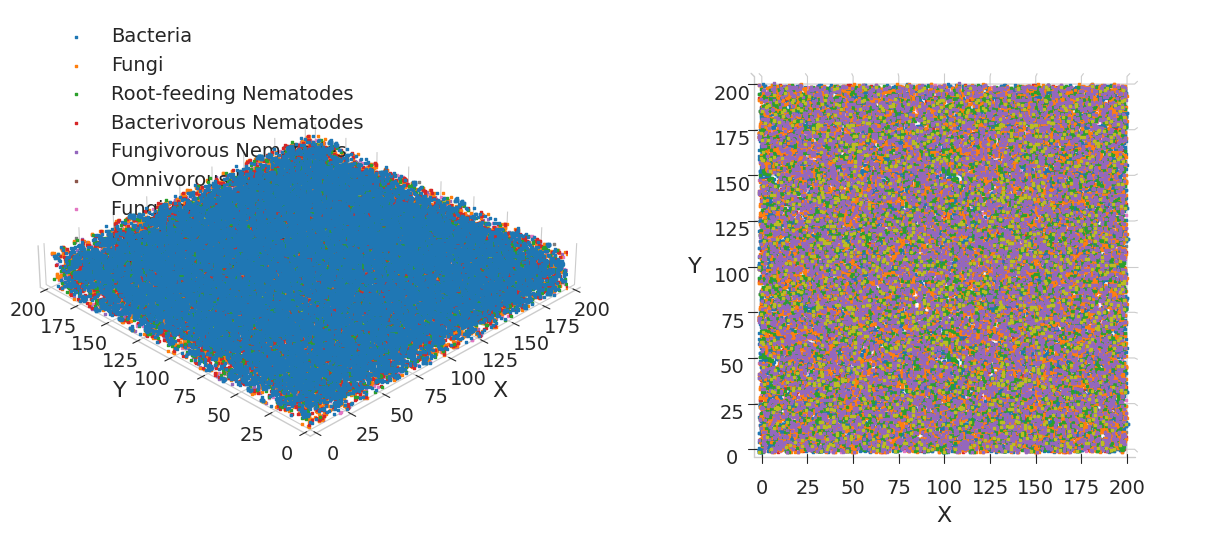

In [190]:
fig = plt.figure(figsize=(15, 15))
#plt.rcParams.update({'text.color': "black", 'axes.labelcolor': "black", 'xtick.color': "black", 'ytick.color': "black"})
ax = fig.add_subplot(1,2,1,projection="3d")
ax.view_init(30, 225)

df1 = df[df["tick"] == 0]

for g in np.unique(df1["type"]):
    ix = np.where(df1["type"] == g)
    ax.scatter(
        df1.iloc[ix]["x"],
        df1.iloc[ix]["y"],
        df1.iloc[ix]["z"],
        color=colors[g],
        label=organism_group_labels[g],
        s=1,
        depthshade=False,
        marker='s',
        alpha=1
    )

ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)
ax.set_zlim(0, z_max)

ax.legend(loc='upper left')
ax.set_xlabel("X", labelpad=12)
ax.set_ylabel("Y", labelpad=12)
ax.set_zticks([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_facecolor("white")
ax.set_aspect('equal')

#plt.rcParams.update({'text.color': "black", 'axes.labelcolor': "black", 'xtick.color': "black", 'ytick.color': "black"})
ax = fig.add_subplot(1,2,2,projection="3d")
ax.view_init(30, 225)

df1 = df[df["tick"] == 0]

for g in np.unique(df1["type"]):
    ix = np.where(df1["type"] == g)
    ax.scatter(
        df1.iloc[ix]["x"],
        df1.iloc[ix]["y"],
        df1.iloc[ix]["z"],
        color=colors[g],
        label=organism_group_labels[g],
        s=1,
        depthshade=False,
        marker='s',
        alpha=1
        )
    
ax.view_init(90,270)
ax.set_aspect('equal')

ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)
ax.set_zlim(0, z_max)

ax.set_xlabel("X", labelpad=10)
ax.set_ylabel("Y", labelpad=10)
ax.set_zticks([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_facecolor("white")

plt.show()

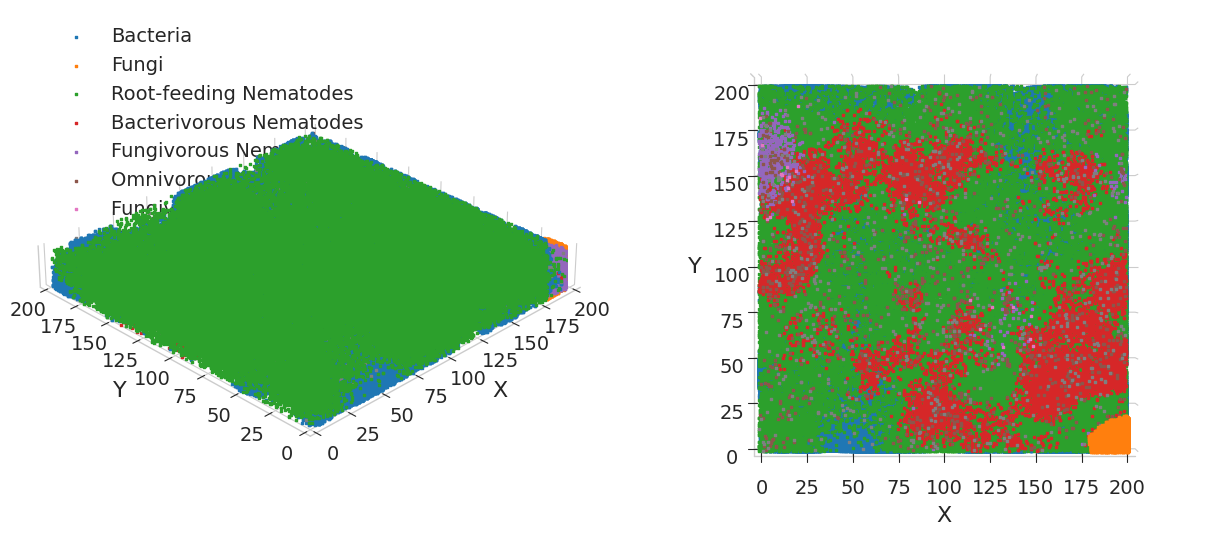

In [191]:
fig = plt.figure(figsize=(15, 15))
#plt.rcParams.update({'text.color': "black", 'axes.labelcolor': "black", 'xtick.color': "black", 'ytick.color': "black"})
ax = fig.add_subplot(1,2,1,projection="3d")
ax.view_init(30, 225)

df1 = df[df["tick"] == df["tick"].max()]

for g in np.unique(df1["type"]):
    ix = np.where(df1["type"] == g)
    ax.scatter(
        df1.iloc[ix]["x"],
        df1.iloc[ix]["y"],
        df1.iloc[ix]["z"],
        color=colors[g],
        label=organism_group_labels[g],
        s=1,
        depthshade=False,
        marker='s',
        alpha=1
    )

ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)
ax.set_zlim(0, z_max)

ax.legend(loc='upper left')
ax.set_xlabel("X", labelpad=12)
ax.set_ylabel("Y", labelpad=12)
ax.set_zticks([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_facecolor("white")
ax.set_aspect('equal')


#plt.rcParams.update({'text.color': "black", 'axes.labelcolor': "black", 'xtick.color': "black", 'ytick.color': "black"})
ax = fig.add_subplot(1,2,2,projection="3d")
ax.view_init(30, 225)

df1 = df[df["tick"] == df["tick"].max()]

for g in np.unique(df1["type"]):
    ix = np.where(df1["type"] == g)
    ax.scatter(
        df1.iloc[ix]["x"],
        df1.iloc[ix]["y"],
        df1.iloc[ix]["z"],
        color=colors[g],
        label=organism_group_labels[g],
        s=1,
        depthshade=False,
        marker='s',
        alpha=1
        )
    
ax.view_init(90,270)
ax.set_aspect('equal')

ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)
ax.set_zlim(0, z_max)

ax.set_xlabel("X", labelpad=10)
ax.set_ylabel("Y", labelpad=10)
ax.set_zticks([])

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_facecolor("white")

plt.show()

In [192]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def update(t):
    ax.cla()
    data = df[df["tick"] == t]

    for g in np.unique(data["type"]):
        ix = np.where(data["type"] == g)
        ax.scatter(
            data.iloc[ix]["x"],
            data.iloc[ix]["y"],
            data.iloc[ix]["z"],
            color=colors[g],
            label=organism_group_labels[g],
            s=10,
            depthshade=False,
            marker='s',
            alpha=1
            )

    ax.set_aspect('equal')
    
    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)
    ax.set_zlim(0, z_max)
    
    ax.set_xlabel("X", labelpad=10)
    ax.set_ylabel("Y", labelpad=10)
    ax.set_zticks([])
    
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.set_facecolor("white")


if vid:
    fig = plt.figure(figsize=(10, 10), dpi=150)
    ax = fig.add_subplot(projection="3d")
    ax.view_init(30, 225)
    ax.set_facecolor("white")

    ani = FuncAnimation(fig=fig, func=update, frames=df["tick"].max(), interval=100)

    ani.save("viz/" + filename + ".mp4")

    plt.show()